# Housing Prices General (First Trial Model)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
df = pd.read_csv("Delhi_v2.csv")
df

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,28.635272,77.370395,2.0,2.0,NaN,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,7214.611872
7734,7734,4510000.0,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060.0,28.581431,77.452819,2.0,2.0,3.0,NaN,Resale,NaN,Semi-Furnished,NaN,ek murti chowk,Flat,\n \n \n...,4254.716981
7735,7735,7000000.0,"Crossings Republik, Ghaziabad, Delhi NCR",1898.0,28.625850,77.435336,4.0,3.0,5.0,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,3688.092729
7736,7736,6500000.0,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.0,28.701622,77.430153,3.0,3.0,2.0,Ready to Move,Resale,1.0,NaN,3.0,vvip mall,Flat,\n \n \n...,4642.857143


In [22]:
#input
x=df['area'].values/1000
x

array([1.35 , 1.49 , 2.385, ..., 1.898, 1.4  , 1.75 ])

In [23]:
#outputs
y=df['price'].values/10000000
y

array([0.56, 0.88, 1.65, ..., 0.7 , 0.65, 0.65])

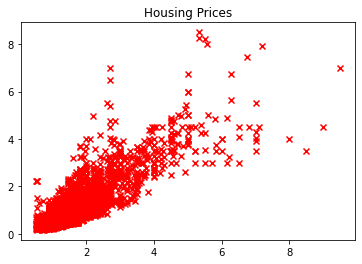

In [24]:
plt.scatter(x, y,marker="x",c="r")
plt.title('Housing Prices')
plt.show()

In [49]:
m = x.shape[0]
m

7738

In [88]:
# def get_cost(x,y,w,b):
#     error=0
#     for i in range(x.shape[0]):
#         z = w*x[i]+b
#         error += (z-y[i])**2
#     J_wb = error/(2*x.shape[0])
#     return J_wb

def get_cost(x,y,w,b):#vectorised
    Z = w*x + b
    err = ((Z-y)**2).sum()
    cost = err / (2*m)
    return cost
    


In [89]:
# def dwdb(x,y,w,b):
#     dj_dw = 0
#     dj_db = 0
#     for i in range(x.shape[0]):
#         z = w*x[i]+b
#         dj_dw += (z - y[i])*x[i]
#         dj_db += (z-y[i])
#     dj_dw /= x.shape[0]
#     dj_db /= x.shape[0]

#     return dj_dw,dj_db

def dwdb(x,y,w,b):
    Z = w*x+b
    dj_dw = np.dot((Z-y),x)/m
    dj_db = np.sum(Z-y)/m
    return dj_dw,dj_db

In [90]:
def grad_desc(x,y,win,bin,alp):
    w = win
    b = bin
    for i in range(10000):
        dj_dw,dj_db=dwdb(x,y,w,b)
        w = w - alp*dj_dw
        b = b - alp*dj_db

    J = get_cost(x,y,w,b)
    return J,w,b

In [93]:
w_in = 0.5
b_in = 0
alpha = 0.01

J,w,b = grad_desc(x,y,w_in,b_in,alpha)
print(f"(w={w},b={b},J={J})")

(w=0.853077022072127,b=-0.3703542190406663,J=0.07279362044083632)


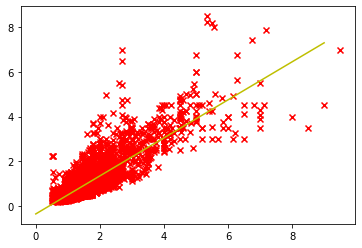

In [92]:
plt.scatter(x,y,marker="x",c="r")
xJ = np.arange(0,10,1)
yJ = w*xJ+b
plt.plot(xJ,yJ,c="y")